#### m: markdown
#### y: cell mode

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip install pyreadstat

In [3]:
raw_welfare = pd.read_spss('Data/Koweps_hpwc14_2019_beta2.sav')

In [4]:
welfare = raw_welfare.copy()
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [5]:
welfare = welfare.rename(
columns = {'h14_g3' : 'sex', # 성별
'h14_g4' : 'birth', # 태어난 연도
'h14_g10' : 'marriage_type', # 혼인 상테
'h14_g11' : 'religion', # 종교
'p1402_8aq1' : 'income', # 일한달의 월 평균 임금
'h14_eco9' : 'code_job', # 직종
'h14_reg7' : 'code_region' # 7개 권역별 지역 구분
})
welfare[['sex', 'birth', 'marriage_type']].head()

,sex,birth,marriage_type
0,2.0,1945.0,2.0
1,1.0,1948.0,2.0
2,1.0,1942.0,3.0
3,1.0,1962.0,1.0
4,2.0,1963.0,1.0


In [6]:
#성별 빈도수
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [7]:
#성별에서 무응답(1,2 이외 값) 결측치 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

0

In [8]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

<AxesSubplot:xlabel='sex', ylabel='count'>

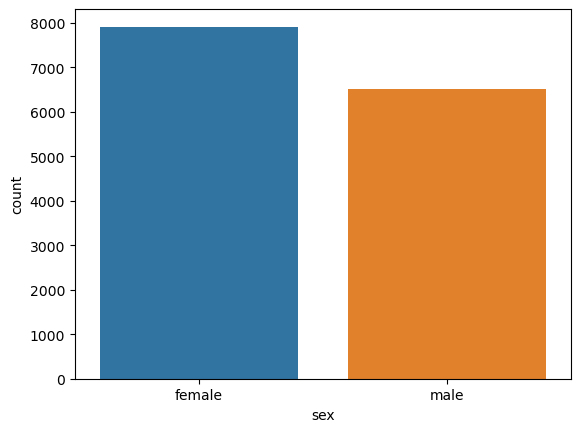

In [9]:
sns.countplot(data=welfare, x='sex')
#barplot으로 그리기
#result = welfare.groupby('sex', as_index=False).agg(n = ('sex', 'count'))
#sns.barplot(result, x= 'sex', y ='n')

<AxesSubplot:xlabel='income', ylabel='Count'>

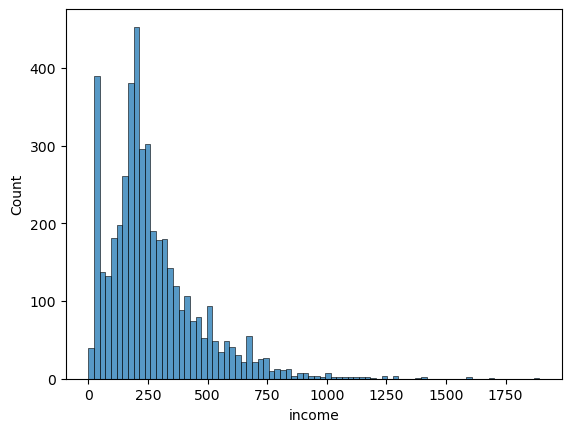

In [11]:
#월급 분포를 히스토그램으로 확인
sns.histplot(data=welfare, x='income')
#sns.histplot(data=welfare, x='income', bins = 10)

In [12]:
# 이상치 확인
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [13]:
# 결측치 확인
# 직업이 없어서 월급을 받지 못하는 응답자
welfare['income'].isna().sum()

9884

In [17]:
# 이상치(9999) 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [19]:
# 결측치 확인
welfare['income'].isna().sum()
# 결측치 제거
#welfare.dropna(subset=['income'])['income'].isna().sum()

9884

In [20]:
# 성별 월급 평균표 만들기
sex_income = welfare.dropna(subset = ['income'])\
.groupby('sex', as_index=False)\
.agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<AxesSubplot:xlabel='sex', ylabel='mean_income'>

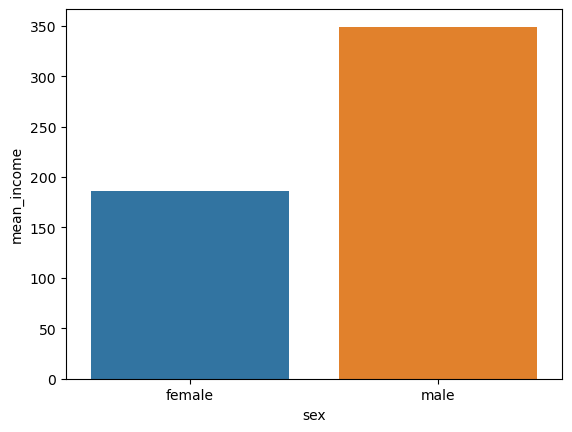

In [21]:
sns.barplot(data=sex_income, x='sex', y='mean_income')